# Customer Churn Prediction by Alan Hsiao

## **EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
dir_data = r'C:\Users\alan\Desktop\Project\Churn Prediction\dataset'
os.chdir(dir_data)
data = pd.read_csv('customer_churn_dataset-training-master.csv', header=0)
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
data.shape

(440833, 12)

In [4]:
data.columns = data.columns.str.replace(' ', '')

In [5]:
data.isna().sum()

CustomerID          1
Age                 1
Gender              1
Tenure              1
UsageFrequency      1
SupportCalls        1
PaymentDelay        1
SubscriptionType    1
ContractLength      1
TotalSpend          1
LastInteraction     1
Churn               1
dtype: int64

In [6]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data.isna().sum()

CustomerID          0
Age                 0
Gender              0
Tenure              0
UsageFrequency      0
SupportCalls        0
PaymentDelay        0
SubscriptionType    0
ContractLength      0
TotalSpend          0
LastInteraction     0
Churn               0
dtype: int64

Since `CustomerID` is irrelevant in predicting probability of `Churn`, we drop it:

In [7]:
data.drop(['CustomerID'], inplace=True, axis=1)

In [8]:
int_col = ['Age', 'Tenure', 'UsageFrequency', 'SupportCalls', 'PaymentDelay', 'TotalSpend', 'LastInteraction', 'Churn']
for col in int_col:
    data[col] = data[col].astype(int)
data.head()

,Age,Gender,Tenure,UsageFrequency,SupportCalls,PaymentDelay,SubscriptionType,ContractLength,TotalSpend,LastInteraction,Churn
0,30,Female,39,14,5,18,Standard,Annual,932,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617,20,1


In [9]:
# Define functions for EDA plotting
def boxplot(df:pd.DataFrame, y:str):
    sns.boxplot(x='Churn', y=y, data=df, palette='Paired')
    plt.title(f'Box Plot of {y} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(y)
    plt.show()

def stacked_barchart(df:pd.DataFrame, x:str):
    fig, ax = plt.subplots(figsize = (4,4))
    temp_df = (df.groupby([x, 'Churn']).size()/df.groupby(x)['Churn'].count()).reset_index().pivot(columns='Churn', index=x, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color=['blue', 'skyblue'], width=0.3)
    ax.xaxis.set_tick_params(rotation=0)
    plt.legend(['No', 'Yes'], loc='upper right')
    ax.set_xlabel(x)
    ax.set_ylabel('Churn Percentage')

def single_barchart(df:pd.DataFrame, x:str):
    plt.figure(figsize=(12,8))
    sns.countplot(data = df , x=x , fill=True, color='#0080FF')
    plt.title(f'Distribution of {x} Among Customers')
    plt.show()

def double_barchart(df:pd.DataFrame, x:str):
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x=x, hue='Churn', fill=True, palette='Paired')
    plt.xlabel(x)
    plt.ylabel('Density')
    plt.title(f'{x} Distribution by Churn')
    plt.legend(['No', 'Yes'], loc='upper right')
    plt.show()

### **Churn - Target**

In [10]:
data.Churn.describe()

count    440832.000000
mean          0.567107
std           0.495477
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Churn, dtype: float64

In [11]:
data.Churn.value_counts()

1    249999
0    190833
Name: Churn, dtype: int64

Based on the statistics, there is around 57% of users churned over 440,832 samples in the dataset. Keep in mind that there are around 50,000 more churned customers than those not.

### **Age**

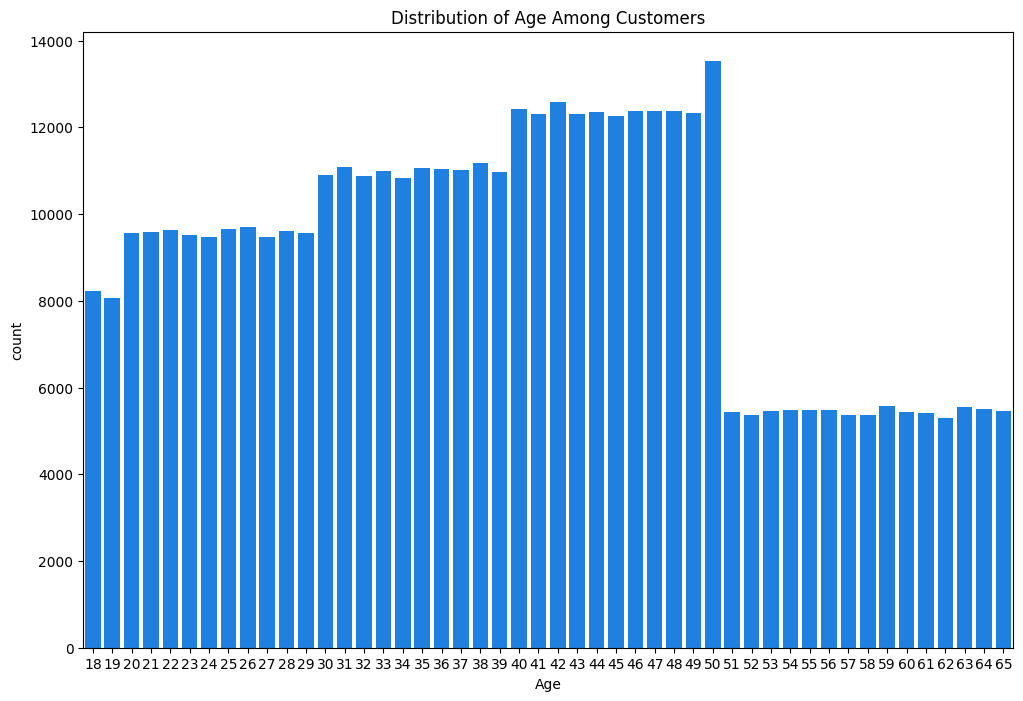

In [12]:
single_barchart(data, 'Age')

The bar chart indicates that there is an upward trend in density between 18-year-old and 50-year-old. However, there is a noticeable drop in density at the 51-year-old mark.

Based on the observation, providing customers with incentives to keep them on the app right before they hit 51-year-old mark becomes a worthwhile topic to discuss.

In [13]:
data[['Age', 'Churn']].groupby('Churn').describe()

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Churn                                                              
0      190833.0  36.262973   9.203910  18.0  29.0  37.0  44.0  50.0
1      249999.0  41.747263  13.975085  18.0  30.0  42.0  54.0  65.0

The statistics indicates that there is a slight difference in mean between the two churn groups. The churned group has relatively higher variance in age, meaning that there is more even spread of churners in different ages.

C:\Users\alan\AppData\Local\Temp\ipykernel_22928\2748412383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=y, data=df, palette='Paired')


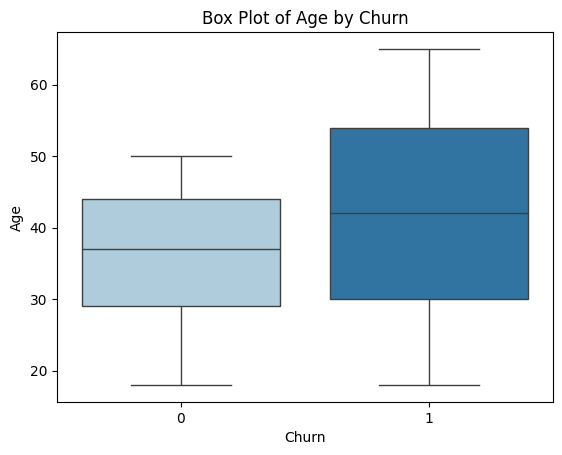

In [14]:
boxplot(data, 'Age')

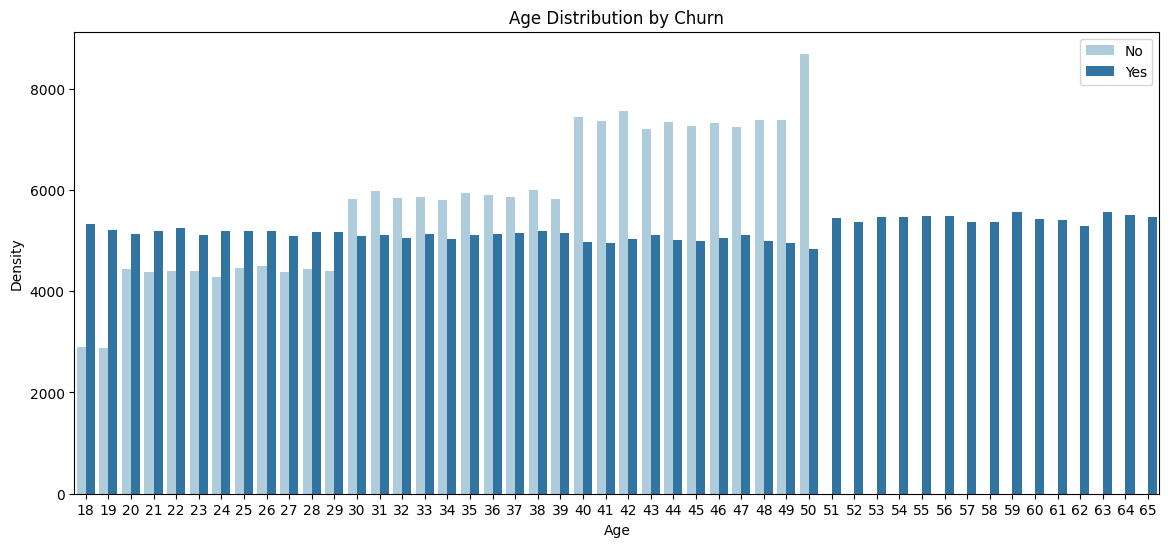

In [15]:
double_barchart(data, 'Age')

Besides the customer density drop at the 51-year-old mark, this double bar chart indicates that all customers churn after they hit the age mark, leaving us to question whether there are any hard factors that make our customers churn.

### **Gender**

In [16]:
data[['Gender', 'Churn']].groupby('Gender').describe()

Churn                                             
           count      mean       std  min  25%  50%  75%  max
Gender                                                       
Female  190580.0  0.666691  0.471397  0.0  0.0  1.0  1.0  1.0
Male    250252.0  0.491269  0.499925  0.0  0.0  0.0  1.0  1.0

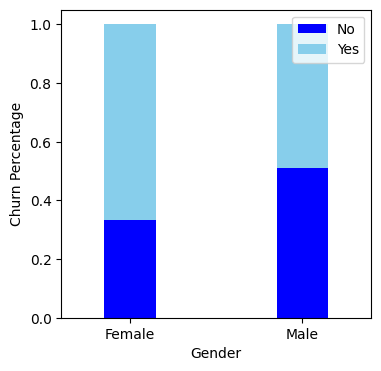

In [17]:
stacked_barchart(data, 'Gender')

We can see that female overall has higher percentage in churning compared to male. `Gender` might be considered as a predictor of `Churn`.

### **Tenure**

In [18]:
data.Tenure.describe()

count    440832.000000
mean         31.256336
std          17.255727
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64

In [19]:
data[['Tenure', 'Churn']].groupby('Churn').describe()

Tenure                                                   
          count       mean        std  min   25%   50%   75%   max
Churn                                                             
0      190833.0  32.281754  17.089172  1.0  18.0  33.0  47.0  60.0
1      249999.0  30.473598  17.341065  1.0  15.0  30.0  46.0  60.0

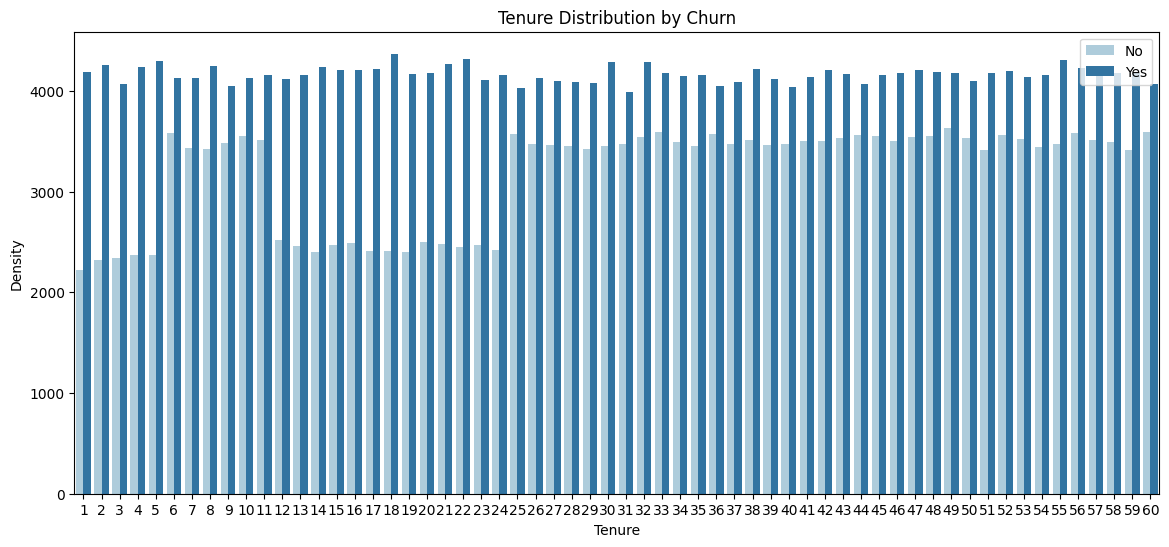

In [20]:
double_barchart(data, 'Tenure')

Based on the statitstics, there is not much difference in mean between the two churn groups. However, the bar chart shows that within churned customers, there is a slight decrease in density as the tenure increases.

### **Usage Frequency**

In [21]:
data.UsageFrequency.describe()

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: UsageFrequency, dtype: float64

In [22]:
data[['UsageFrequency', 'Churn']].groupby('Churn').describe()

UsageFrequency                                                  
               count       mean       std  min   25%   50%   75%   max
Churn                                                                 
0           190833.0  16.260552  8.446843  1.0  10.0  17.0  24.0  30.0
1           249999.0  15.461658  8.675252  1.0   8.0  15.0  23.0  30.0

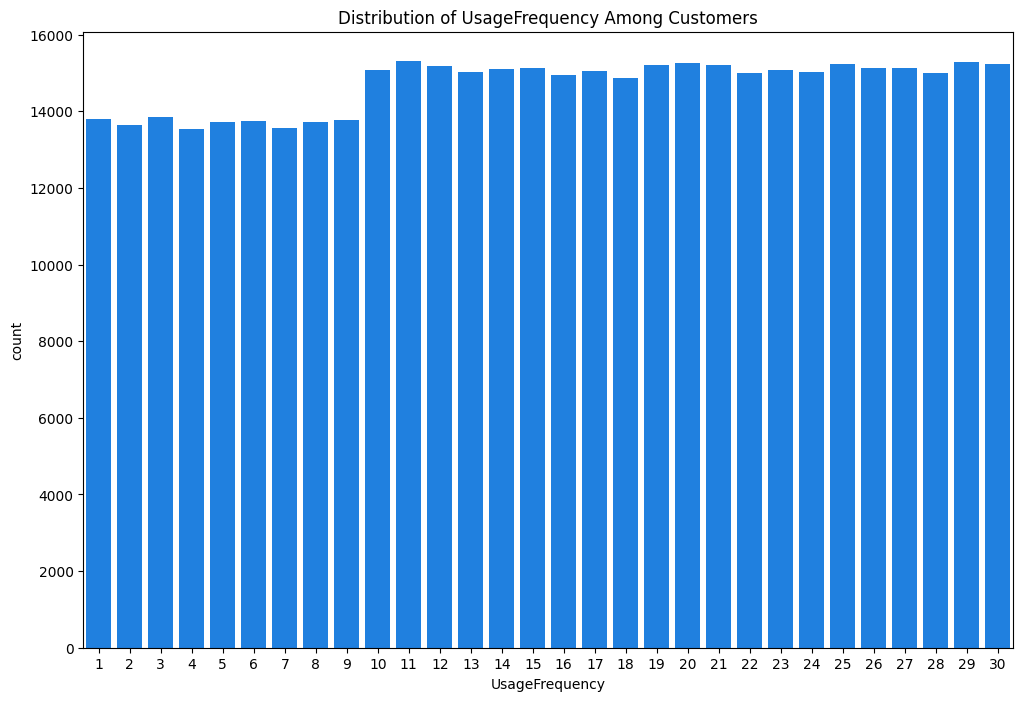

In [23]:
single_barchart(data, 'UsageFrequency')


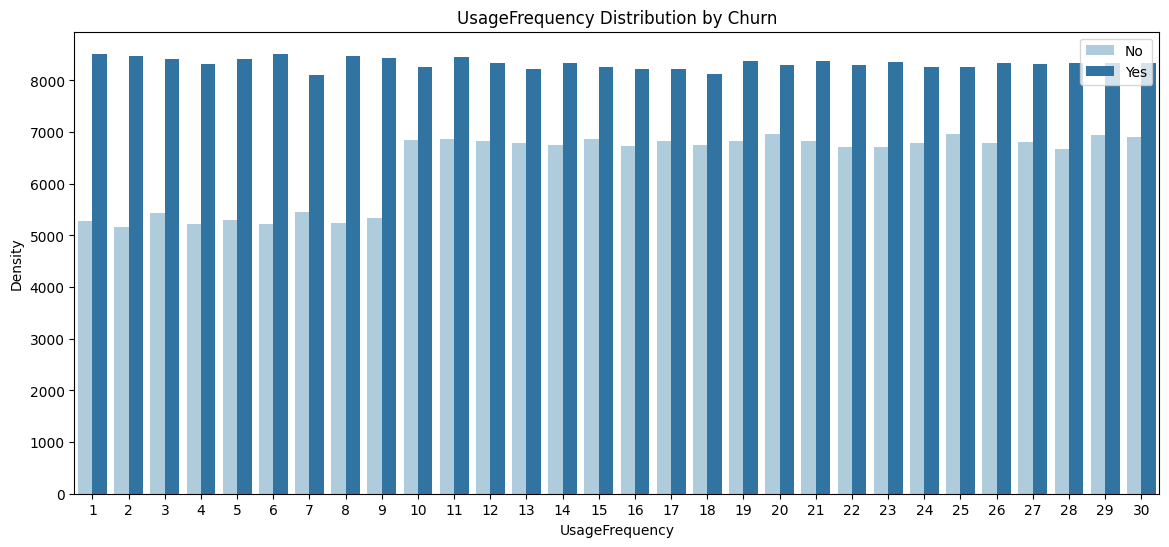

In [24]:
double_barchart(data, 'UsageFrequency')

Just like `Tenure`, `UsageFrequency` shows little difference in mean between the two churn groups.

### **Support Calls**

In [25]:
data.SupportCalls.describe()

count    440832.000000
mean          3.604437
std           3.070218
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: SupportCalls, dtype: float64

In [26]:
data[['SupportCalls', 'Churn']].groupby('Churn').describe()

SupportCalls                                              
             count      mean       std  min  25%  50%  75%   max
Churn                                                           
0         190833.0  1.586418  1.289975  0.0  0.0  1.0  3.0   5.0
1         249999.0  5.144861  3.141639  0.0  2.0  5.0  8.0  10.0

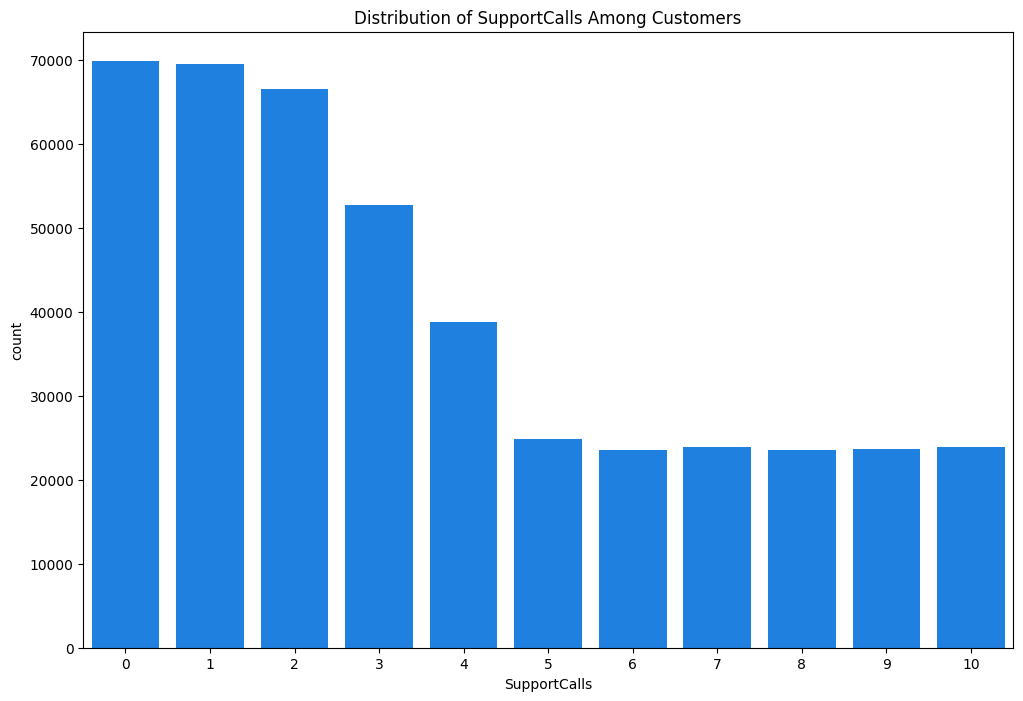

In [45]:
single_barchart(data, 'SupportCalls')


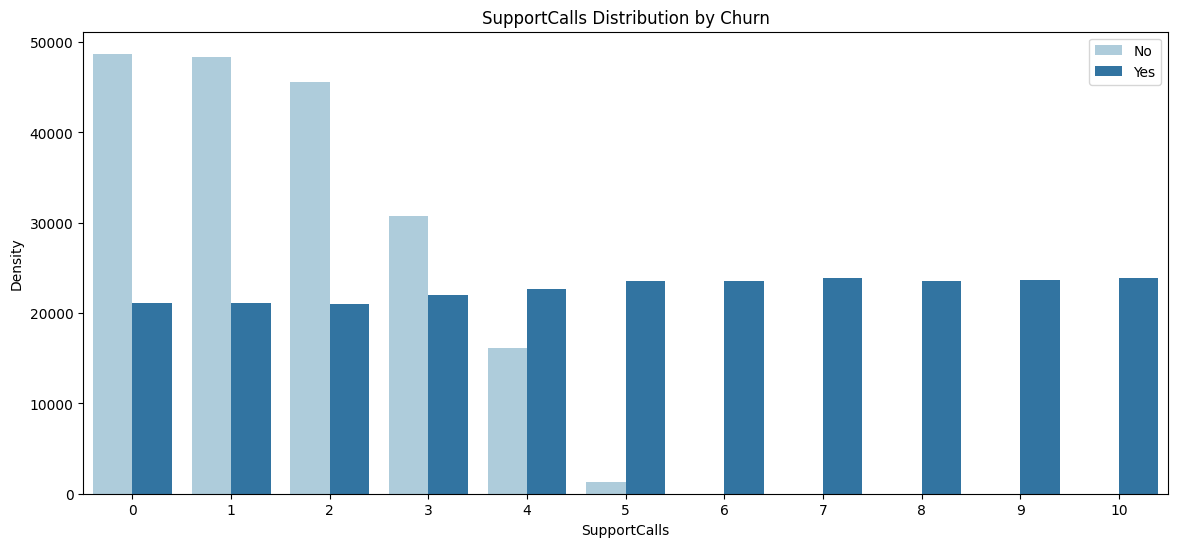

In [46]:
double_barchart(data, 'SupportCalls')

Based on the statistics and plot, we can see that there is a visible difference in mean between the two `Churn` categories. Thus, `SupportCalls` is a variable we need to investigate further.

### **Payment Delay**

In [29]:
data.PaymentDelay.describe()

count    440832.000000
mean         12.965722
std           8.258063
min           0.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          30.000000
Name: PaymentDelay, dtype: float64

In [30]:
data[['PaymentDelay', 'Churn']].groupby('Churn').describe()

PaymentDelay                                                 
             count       mean       std  min  25%   50%   75%   max
Churn                                                              
0         190833.0  10.015500  6.056744  0.0  5.0  10.0  15.0  20.0
1         249999.0  15.217729  8.974081  0.0  7.0  15.0  23.0  30.0

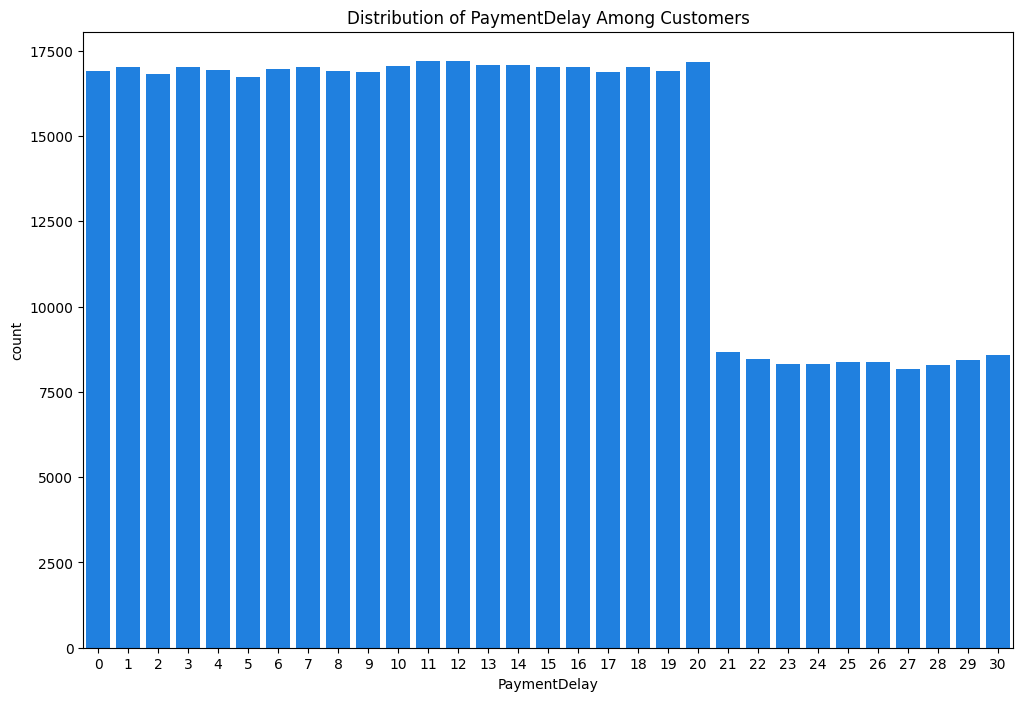

In [31]:
single_barchart(data, 'PaymentDelay')


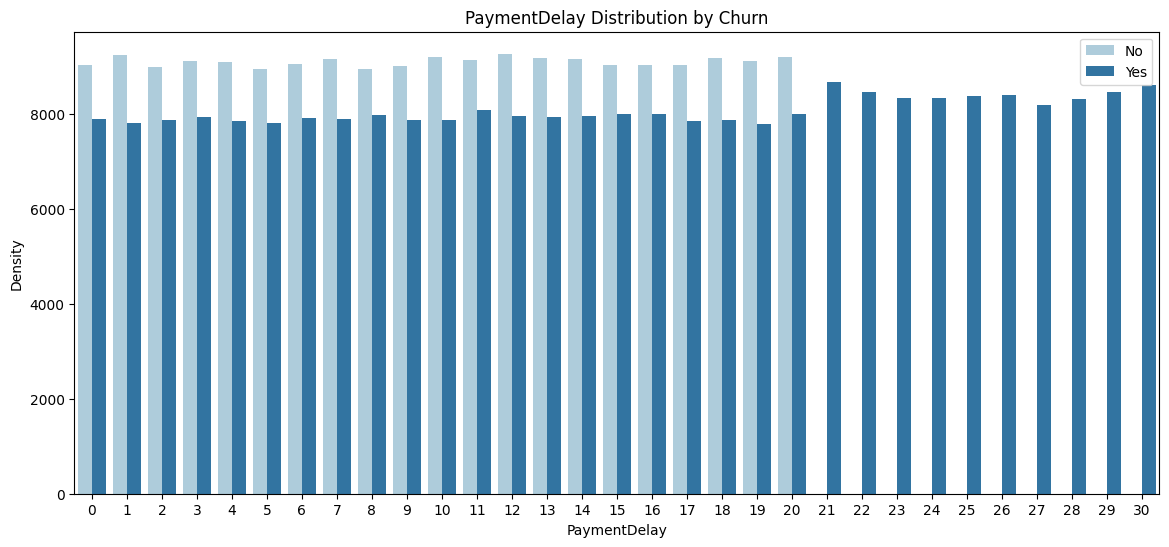

In [32]:
double_barchart(data, 'PaymentDelay')

We should also further investigate on this variable, since there is some difference between the two `Churn` group.

### **Subscription Type**

In [33]:
data[['SubscriptionType', 'Churn']].groupby('SubscriptionType').describe()

Churn                                             
                     count      mean       std  min  25%  50%  75%  max
SubscriptionType                                                       
Basic             143026.0  0.581782  0.493268  0.0  0.0  1.0  1.0  1.0
Premium           148678.0  0.559417  0.496459  0.0  0.0  1.0  1.0  1.0
Standard          149128.0  0.560700  0.496304  0.0  0.0  1.0  1.0  1.0

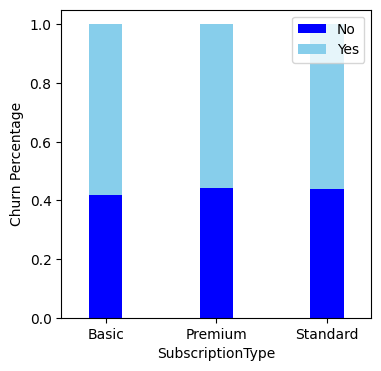

In [34]:
stacked_barchart(data, 'SubscriptionType')

We can see that `SupscriptionType` is probably not a relevant variable, but we should also look into it since multicollinearity might hinder us from knowing the relevance to the target variable. 

### **Contract Length**

In [35]:
data[['ContractLength', 'Churn']].groupby('ContractLength').describe()

Churn                                             
                   count      mean       std  min  25%  50%  75%  max
ContractLength                                                       
Annual          177198.0  0.460761  0.498459  0.0  0.0  0.0  1.0  1.0
Monthly          87104.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Quarterly       176530.0  0.460256  0.498419  0.0  0.0  0.0  1.0  1.0

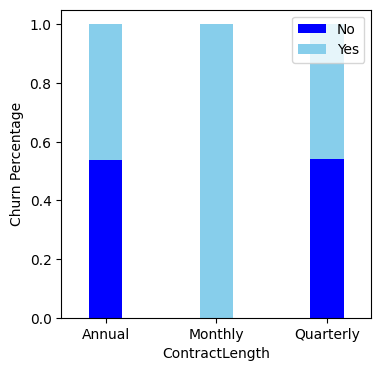

In [36]:
stacked_barchart(data, 'ContractLength')

Here, we can discover a very interesting fact: customers subscribing monthly always churn. The reason behind this will need to be further investigated.

### **Total Spend**

In [37]:
data.TotalSpend.describe()

count    440832.000000
mean        631.344771
std         240.722712
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: TotalSpend, dtype: float64

In [38]:
data[['TotalSpend', 'Churn']].groupby('Churn').describe()

TotalSpend                                                            
           count        mean         std    min    25%    50%    75%     max
Churn                                                                       
0       190833.0  749.467194  144.222348  500.0  625.0  749.0  874.0  1000.0
1       249999.0  541.177785  259.851079  100.0  316.0  534.0  767.0  1000.0

Curious to see whether there is high correlation between `ContractLength` and `TotalSpend`. It seems like these two are connected since the longer the subscription, the total spending will be higher.

C:\Users\alan\AppData\Local\Temp\ipykernel_22928\1002730674.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ContractLength', y='TotalSpend', data=data, palette='Paired')


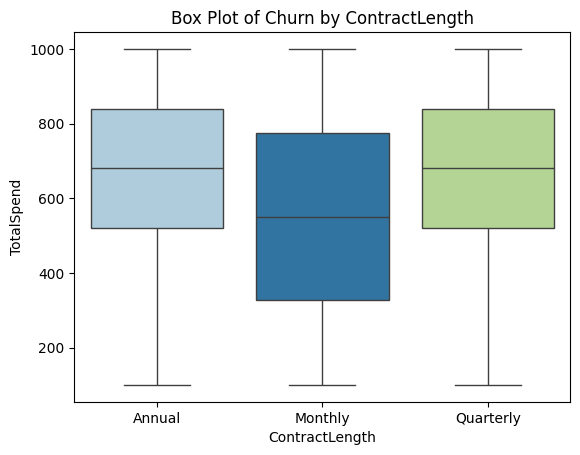

In [39]:
sns.boxplot(x='ContractLength', y='TotalSpend', data=data, palette='Paired')
plt.title(f'Box Plot of Churn by ContractLength')
plt.xlabel('ContractLength')
plt.ylabel('TotalSpend')
plt.show()

It turns out there is a visible difference between Monthly, and Annual and Quarterly contract length. Thus, there might be collinearity issue worth noted.

We can discover that when `TotalSpend` is lower, customers tend to churn more. Moreover, the variability in the churn group indicates that are potentially several subgroups within the churned customers that have different spending behaviors.

### **Last Interaction**

In [40]:
data.LastInteraction.describe()

count    440832.000000
mean         14.480868
std           8.596208
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          30.000000
Name: LastInteraction, dtype: float64

In [41]:
data[['LastInteraction', 'Churn']].groupby('Churn').describe()

LastInteraction                                                 
                count       mean       std  min  25%   50%   75%   max
Churn                                                                 
0            190833.0  13.008804  8.291378  1.0  6.0  12.0  19.0  30.0
1            249999.0  15.604546  8.654930  1.0  8.0  16.0  23.0  30.0

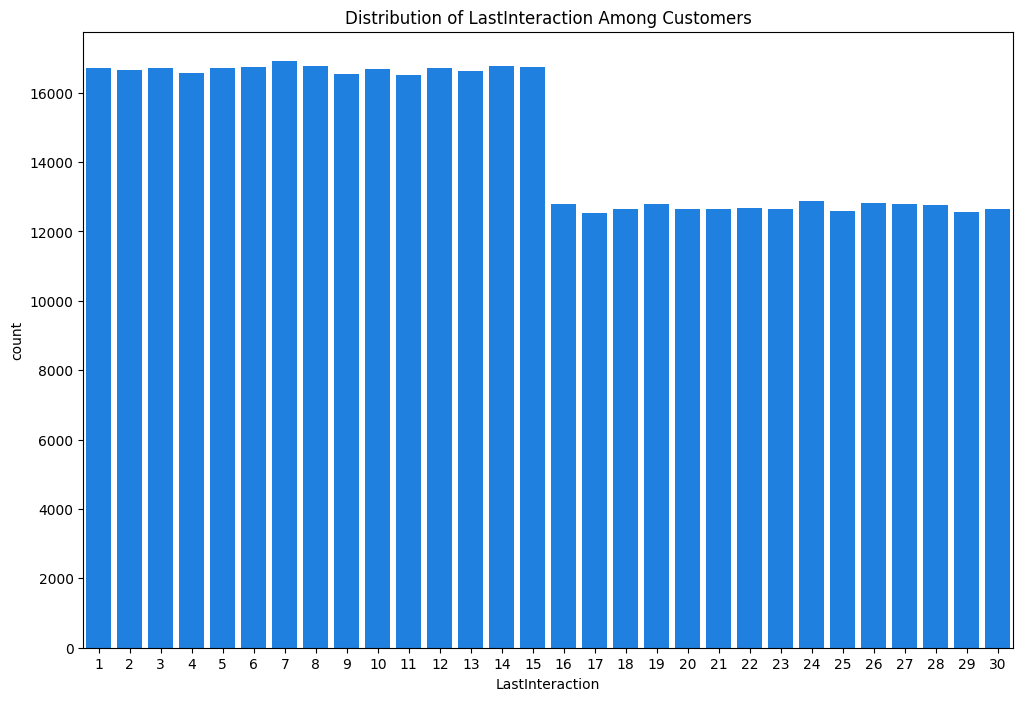

In [42]:
single_barchart(data, 'LastInteraction')


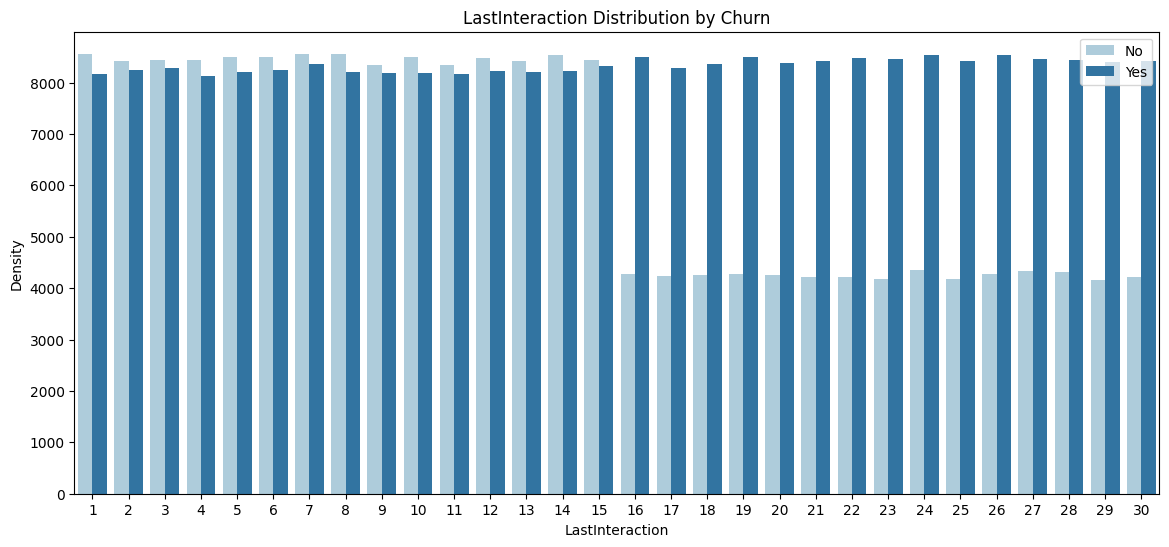

In [43]:
double_barchart(data, 'LastInteraction')

There is a noticeable difference in mean between the two churn groups, with variance basically remaining the same.

The double bar chart indicates that customers with recent interactions are less likely to churn, while customers with longer periods since their last interaction are more likely to churn. Also, there is a noticeable drop in the density of non-churned customers starting around the 15-day mark, with a corresponding rise in the density of churned customers.

Based on this observation, the client is encouraged to engage with customers right before the 15-day mark to prevent churn.

In [2]:
# Define the function for data preprocessing during the EDA process for Data Modeling step
def dataprep_EDA(filepath:str):
    data = pd.read_csv(filepath, header=0)
    data.columns = data.columns.str.replace(' ', '')
    data.dropna(inplace=True)
    data.reset_index(inplace=True, drop=True)
    data.drop(['CustomerID'], inplace=True, axis=1)
    int_col = ['Age', 'Tenure', 'UsageFrequency', 'SupportCalls', 'PaymentDelay', 'TotalSpend', 'LastInteraction', 'Churn']
    for col in int_col:
        data[col] = data[col].astype(int)
    return data